<a href="https://colab.research.google.com/github/Martindelosrios/pyROGER/blob/dev/EXAMPLES/Example1_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Martindelosrios/pyROGER.git
!pip install pyROGER/

Cloning into 'pyROGER'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 99 (delta 43), reused 80 (delta 24), pack-reused 0
Receiving objects: 100% (99/99), 402.14 KiB | 2.91 MiB/s, done.
Resolving deltas: 100% (43/43), done.
pyROGER  sample_data


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import pkg_resources
DATA_PATH = pkg_resources.resource_filename("pyROGER", "../dataset/")


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from mlxtend.plotting import plot_confusion_matrix

from pyROGER import roger
from pyROGER import models

In [19]:
# Color scheme
cl_col  = 'red'
rin_col = 'green'
bs_col  = 'orange'
inf_col = 'blue'
itl_col = 'gray'

labels = ['CL', 'RIN', 'BS', 'IN', 'ITL']

In [20]:
# Old ROGER 1 data
data = pd.read_csv(DATA_PATH + 'highmass_testset_roger1.csv', sep = ' ')
data = np.asarray(data)

data[np.where(data[:,2] == 'CL')[0], 2] = 0
data[np.where(data[:,2] == 'RIN')[0], 2] = 1
data[np.where(data[:,2] == 'BS')[0], 2] = 2
data[np.where(data[:,2] == 'IN')[0], 2] = 3
data[np.where(data[:,2] == 'ITL')[0], 2] = 4
data = data.astype('float64')

cl  = data[np.where(data[:,2] == 0)[0]]
rin = data[np.where(data[:,2] == 1)[0]]
bs  = data[np.where(data[:,2] == 2)[0]]
inf = data[np.where(data[:,2] == 3)[0]]
itl = data[np.where(data[:,2] == 4)[0]]

print('Hay ' + str(len(cl)) + ' cluster galaxies')
print('Hay ' + str(len(rin)) + ' recent infalling galaxies')
print('Hay ' + str(len(bs)) + ' backsplash galaxies')
print('Hay ' + str(len(inf)) + ' infalling galaxies')
print('Hay ' + str(len(itl)) + ' interlooper galaxies')

Hay 343 cluster galaxies
Hay 308 recent infalling galaxies
Hay 526 backsplash galaxies
Hay 837 infalling galaxies
Hay 916 interlooper galaxies


Text(0.5, 0, 'v')

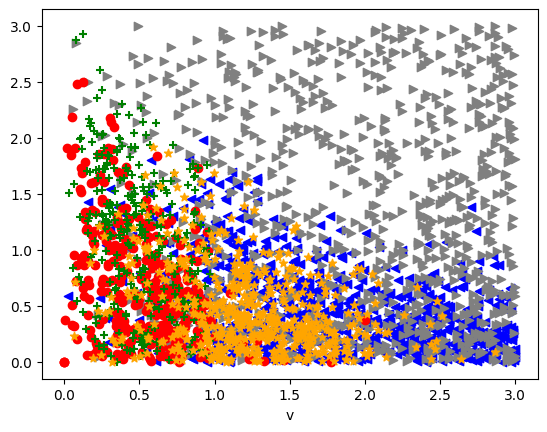

In [21]:
plt.scatter(inf[:,0], inf[:,1], c = inf_col, marker = '<')
plt.scatter(itl[:,0], itl[:,1], c = itl_col, marker = '>')
plt.scatter(cl[:,0], cl[:,1], c = cl_col)
plt.scatter(rin[:,0], rin[:,1], c = rin_col, marker = '+')
plt.scatter(bs[:,0], bs[:,1], c = bs_col, marker = '*')
plt.xlabel('r')
plt.xlabel('v')

In [22]:
models.HighMassRoger1

 ROGER model for isolated galaxy clusters with masses
bigger than >10^{13} M_{sun}.
  This model is equivalent to the one presented in XXXX.XXXX and
  in the ROGER Website.

 NOT TRAINED YET

In [23]:
models.HighMassRoger1.train()

Training ...
KNeighborsClassifier(n_neighbors=3)
Training ...
RandomForestClassifier(max_depth=2, random_state=0)
Training ...
SVC(probability=True)


In [24]:
real_class = data[:,2]
pred_class = models.HighMassRoger1.predict_class(data[:,(0,1)], 0)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

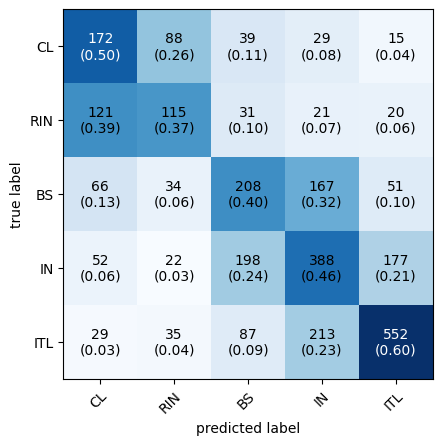

In [25]:
conf_mat = models.HighMassRoger1.confusion_matrix(real_class, pred_class)
plot_confusion_matrix(conf_mat, show_absolute=True, show_normed=True, class_names=labels)